# Problem Statement:

### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

## Key attributes of the database


The database includes the following indicators:

* `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
* `country_long` (text): longer form of the country designation
* `name` (text): name or title of the power plant, generally in Romanized form
* `gppd_idnr` (text): 10 or 12 character identifier for the power plant
* `capacity_mw` (number): electrical generating capacity in megawatts
* `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `primary_fuel` (text): energy source used in primary electricity generation or export
* `other_fuel1` (text): energy source used in electricity generation or export
* `other_fuel2` (text): energy source used in electricity generation or export
* `other_fuel3` (text): energy source used in electricity generation or export
* `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
* `owner` (text): majority shareholder of the power plant, generally in Romanized form
* `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
* `url` (text): web document corresponding to the `source` field
* `geolocation_source` (text): attribution for geolocation information
* `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
* `year_of_capacity_data` (number): year the capacity information was reported
* `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
* `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
* `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
* `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
* `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
* `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
* `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
* `generation_data_source` (text): attribution for the reported generation information
* `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
* `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
* `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
* `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
* `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
* `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
* `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
* `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
* `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
* `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

#### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# Downlaod Files:

* https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [134]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Import Zscore
from scipy.stats import zscore

#Importing Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, PowerTransformer, StandardScaler

#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import PCA
from sklearn.decomposition import PCA

#Import train test split
from sklearn.model_selection import train_test_split

#Import Smote
from imblearn.over_sampling import SMOTE

#Importing Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing Evaluation metrics for Regression models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report
import scikitplot as sktplt

#Import pickle
import pickle

In [2]:
#Read dataset
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
#Checking raws and columns of dataset
df.shape

(907, 27)

* Datset contains 907 rows and 27 columns

In [4]:
#Checking types of datset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

* Here I can see dataset contains different features with different data types. In this dataset 2 types of data are preset object and float, will take care of the object type data using encoding techniques in further process. 

In [5]:
#Checking dataset ifno
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

* I can see some features contains null values.

In [6]:
#Checking unique values of the dataset
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

* From above info we can check the number of unique values present in each columns.

-- The columns country, country long, other fuel2, year of capacity data and generation data source have only 1 unique value. Also, Other fuel 3, wepp id, estimated generation gwh have no unique values which means they are filled with only NaN values. Since these features have same entries we can drop these columns.

In [7]:
#Checking count of country
df['country'].value_counts()

IND    907
Name: country, dtype: int64

* There is only 1 country in the dataset hence we can drop this column as it has nothing to do with our prediction.

In [8]:
#Droping country and country long columns
df.drop(columns = ['country', 'country_long'], axis = 1, inplace = True)

In [9]:
#Dropping some irrelevent columns 
df.drop(columns = ['other_fuel2', 'year_of_capacity_data', 'generation_data_source', 'other_fuel3', 'wepp_id', 'estimated_generation_gwh'], axis = 1, inplace = True)

In [10]:
#Checking the count of name column
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

* Here I can see that the name column has unique name for each power plant so dropping this column as well.

In [11]:
#Droping name column
df.drop(['name'], axis = 1, inplace = True)

In [12]:
#Checking count of gppd_idnr column
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

* Here I can observe that, column gppd_idnr contains the unique IDs of each power plant, hence will drop this column as well.

In [13]:
df.drop(['gppd_idnr'], axis = 1, inplace = True)

* The columns owner has more than 65% of null values filling this much values can lead to wrong prediction hence droping this column as well.

In [14]:
df.drop('owner', axis = 1, inplace = True)

* The column url has no connection with target  and it has nothing to do with preddiction so will drop this column.

In [15]:
df.drop('url', axis = 1, inplace = True)

In [16]:
#Checking null values
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

* Here I can see most of columns have a lot of missing values so will fill them using imputation techniques later.

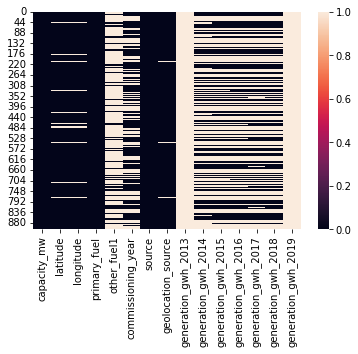

In [17]:
#Visualizing null valus
sns.heatmap(df.isnull())
plt.show()

* Here I can clearly see that in this heatmap white line indicates the null values present in the dataset.
* Generation_gwh_2013 and generation_gwh_2019 columns have no data all are null values hence will drop these columns.

In [18]:
#Droping generation_gwh_2013 and generation_gwh_2019 columns
df.drop(columns = ['generation_gwh_2013', 'generation_gwh_2019'], axis = 1, inplace = True)

# Treat Null Values

In [19]:
#Checking mean of latitude
df['latitude'].mean()

21.19791811846691

In [20]:
#Filling missing values of laitude using mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

* The features other_fuel1 and geolocation_source have categorical data so will fill the null values using mode.

In [21]:
#Checking mode of other_fuel1
df['other_fuel1'].mode()

0    Oil
dtype: object

In [22]:
#Checking mode of geoloaction_source
df['geolocation_source'].mode()

0    WRI
dtype: object

* Mode of other_fuel1 is oil and mode of geolocation column is WRI which means they have more values counts in those columns. Will fill the null values of these columns by their respentive modes.

In [23]:
#Replacing null values of other_fuel1 with oil
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [24]:
#Replacing null values of geolocation source with WRI
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

* The columns longitude commissioning year, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018 are in numerical value will fill the missing values using median.

In [25]:
#Filling missing values with their median.
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

In [26]:
#Checking null values after imputation
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

* All the null values have been taken care of. 

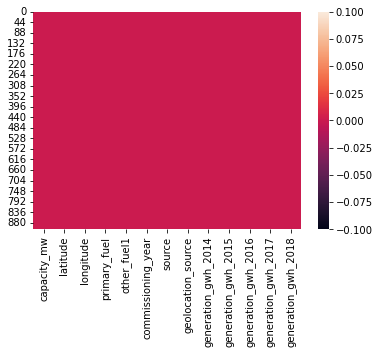

In [27]:
#Visualizing null values after imputation
sns.heatmap(df.isnull())
plt.show()

* We can clearly see that no null values present in the dataset.

In [28]:
#Checking columns of the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [29]:
#Checking list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [30]:
#Checking list of counts of primary_fuel
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [31]:
#Will extract powerplant age from commissioning year by substracting it from the year 2019
df['Power_plant_age'] = 2019 - df['commissioning_year']
df.drop('commissioning_year', axis = 1, inplace = True)

In [32]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


In [33]:
#Checking statistical summary of the dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,20.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,16.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,18.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


# Observations:

* The counts of all columns are same which mean no null values present in the dataset.
* The mean is more than the median(50%) for all columns except latitude which means they are skewed to the right.
* The median is bit greater than the mean in the column latitude which means it is skewed to the left.'
* The difference between maximum and 75% is huge which means the are outliers present. will remove them using appropriate techniques before building model.
* The minimum capacity of the power plant is 0 and maximum is 4760. Also, there is a huge difference in mean and standard deviation.

In [34]:
#Will separate categorical and numerical columns
categorical_cols = []
numerical_cols = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)
print('Categorical Columns are : ', categorical_cols)
print('************************************************************************************************************************')
print('Numerical Columns are: ', numerical_cols)

Categorical Columns are :  ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
************************************************************************************************************************
Numerical Columns are:  ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


# Data Visualization

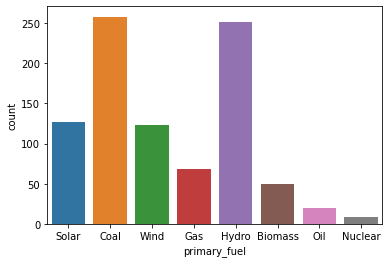

In [35]:
#Visualizing the types of fuel 
sns.countplot(df['primary_fuel'])
plt.show()

* From the above plot I can observe that coal generates the highest electricity followed by hydro and nuclear generates the least electricity.

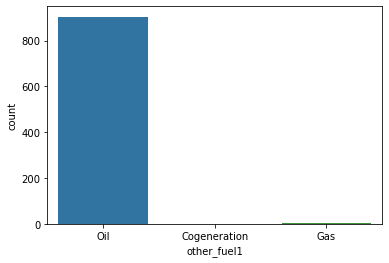

In [36]:
#Visualizing the counts of other fuel1
sns.countplot(df['other_fuel1'])
plt.show()

 * The are 3 unique values in other fuel1 and the count of oil is higher compared to rest 2.

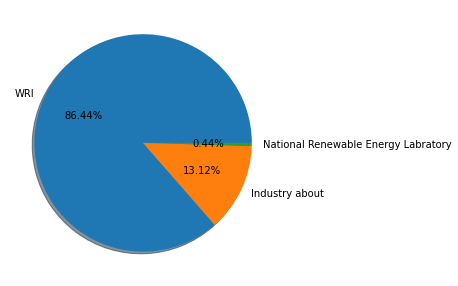

In [37]:
#Visualizing the counts of owner
labels = 'WRI', 'Industry about', 'National Renewable Energy Labratory'
fig, ax = plt.subplots(figsize = (10,5))
ax.pie(df['geolocation_source'].value_counts(), labels = labels, autopct = '%1.2f%%', shadow = True)
plt.show()

* The above plot shows that the geolocation source World Resources Institute (WRI) has the highest counts which means WRI gives more geolocation information than other two sources.

# Comparing target variable capacity _mw with rest of the features

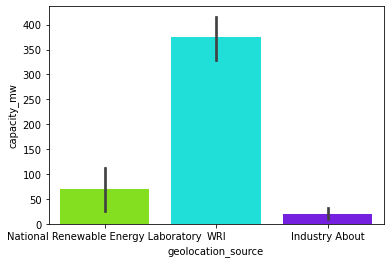

In [38]:
#Visualize relationship between source and capacity_mw
sns.barplot('geolocation_source', 'capacity_mw', data = df, palette = 'hsv')
plt.show()

* WRI has the highest capacity which is more than 350 mega watts and industry About has the least capacity.

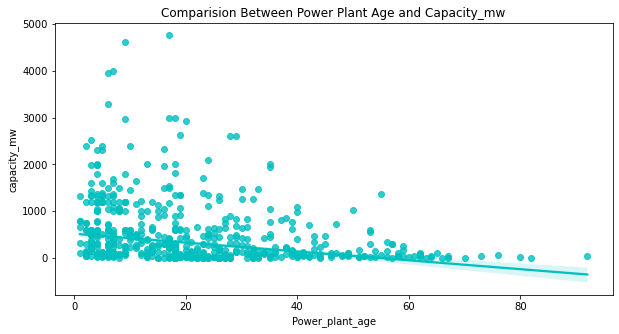

In [39]:
#Visualize the relationship of power plant and age capacity_mw
plt.figure(figsize = (10,5))
plt.title('Comparision Between Power Plant Age and Capacity_mw')
sns.regplot(df['Power_plant_age'], df['capacity_mw'], color = 'c')
plt.show()

* From the above plot I can observe that there is negative linear relationship between capacity mw and power plant age. Also, we can infer that the capacity of older power plant is less compared to the power plants which are new.

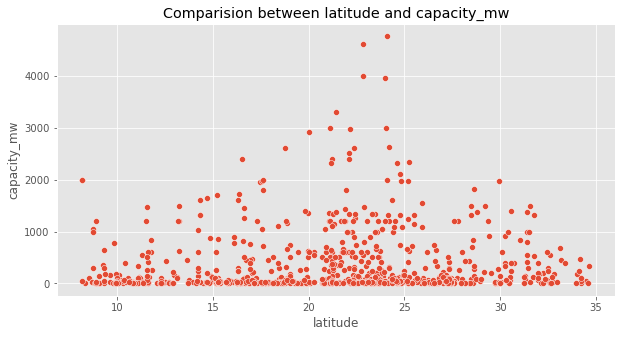

In [40]:
#Let's visualize how the capacity is related to latitude of the power plant
plt.figure(figsize = (10,5))
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot('latitude', 'capacity_mw', data = df)
plt.show()

* The relationship between latitude and capacity mw is not linear I can also see some outliers present.

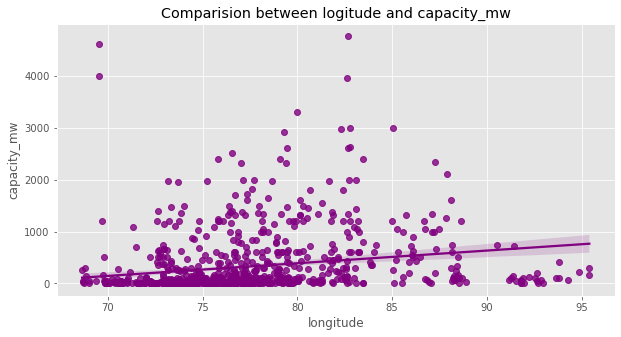

In [41]:
#Let's visualize how the capacity is related to longitude of the power plant
plt.figure(figsize = (10,5))
plt.style.use('ggplot')
plt.title('Comparision between logitude and capacity_mw')
sns.regplot('longitude', 'capacity_mw', data = df, color = 'purple')
plt.show()

* I can see there is a very weak linear relationship between longitude and capacity. Here also we have outliers present.

<Figure size 432x432 with 0 Axes>

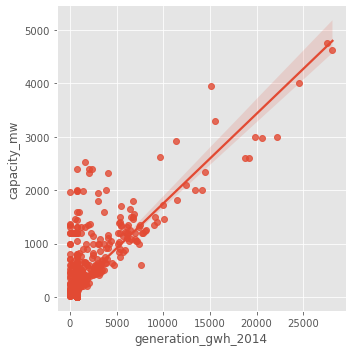

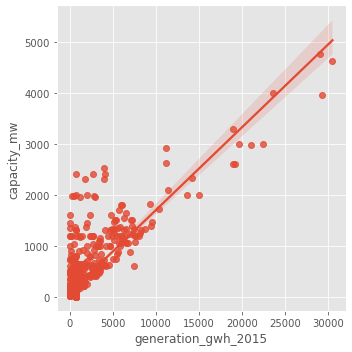

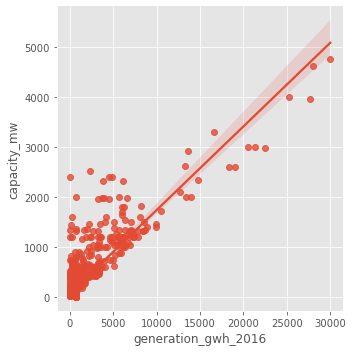

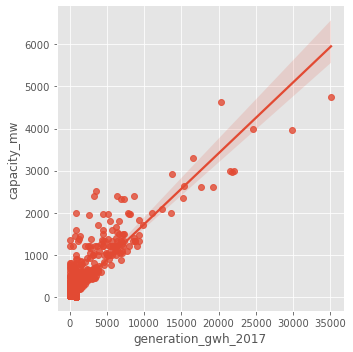

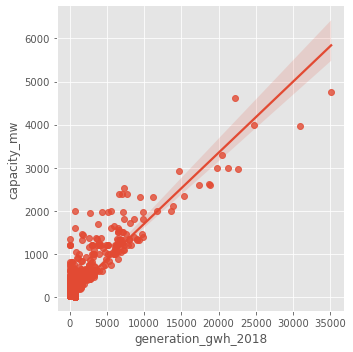

In [42]:
#Let's visualize the relationship between capacity_mw and generation_gwh
plt.figure(figsize = (6,6))
cols = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for col in cols:
    sns.lmplot(x = col, y = 'capacity_mw', data = df)
plt.show()

# Observations:
    
   * There is a positive linear relationship between capacity and the electricity generation reported for the years mentioned.
   * As the electricity generation growth increases , the capacity of the plant is also increasing moderately.

# Comparing the target variable primery fuel with other features.

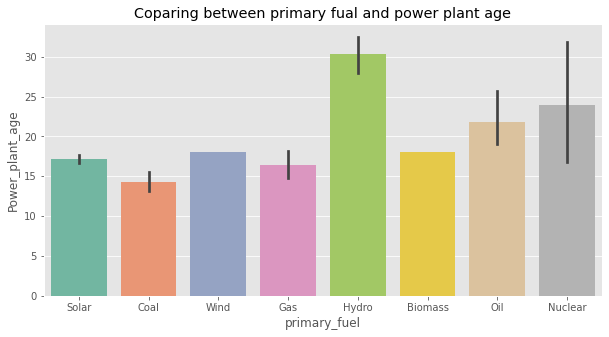

In [43]:
#Let's visualize how power plant age effects fuel types
plt.figure(figsize = (10,5))
plt.title('Coparing between primary fual and power plant age')
sns.barplot(x = 'primary_fuel', y = 'Power_plant_age', data = df, palette = 'Set2')
plt.show()

* Most of the power plant uses Hydro (water) to generate electricity followed by Nuclear and Oil.
* The Power plants which are recently constructed uses solar, coal and gas to genearte electricity.

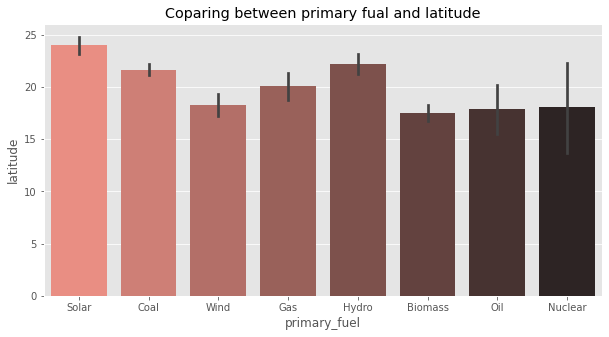

In [44]:
#Let's Visualize how primary fuel is related to latitude of the power plant
plt.figure(figsize = (10,5))
plt.title('Coparing between primary fual and latitude')
sns.barplot(x = 'primary_fuel', y = 'latitude', data = df, palette = 'dark:salmon_r')
plt.show()

* I can observe that Solar has high latitude around 24 followed by Hydro, Coal and Gas.

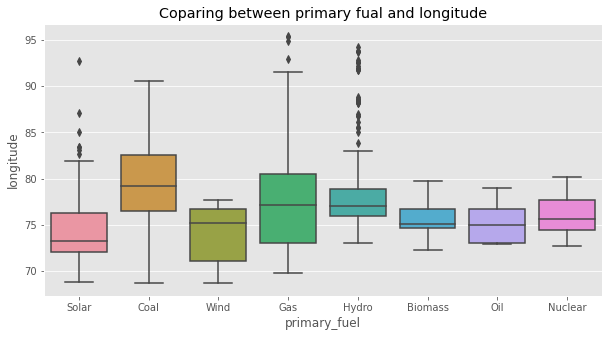

In [45]:
#Let's Visualize how primary fuel is related to longitude of the power plant
plt.figure(figsize = (10,5))
plt.style.use('ggplot')
plt.title('Coparing between primary fual and longitude')
sns.boxplot(x = 'primary_fuel', y = 'longitude', data = df)
plt.show()

* Fuel type Gas has highest longitude followed by Hydro, Solar and Coal.

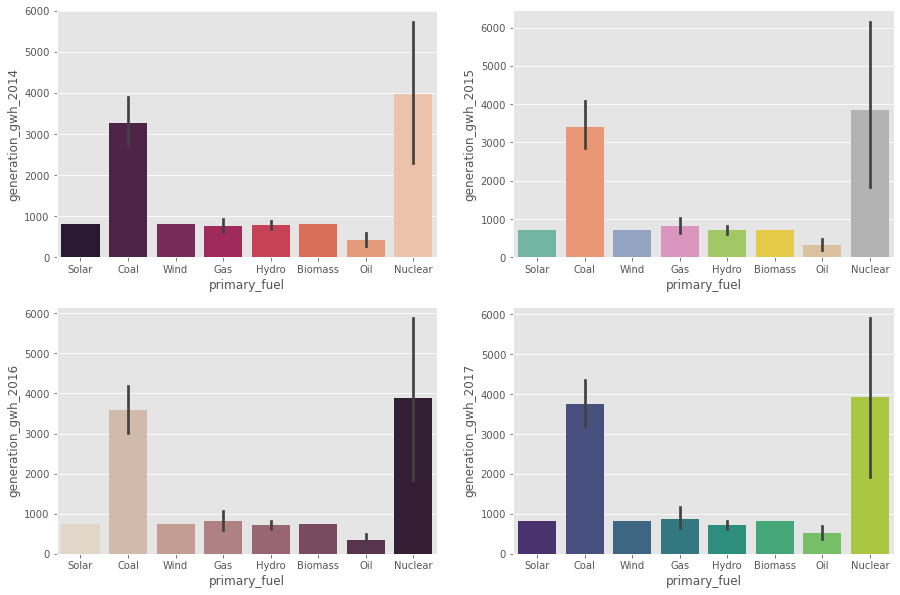

In [46]:
#Visualizing the relationship between primary_fuel and generation_gwh
fig, axes = plt.subplots(2,2, figsize = (15, 10))
sns.barplot('primary_fuel', 'generation_gwh_2014', data = df, ax = axes[0,0], palette = 'rocket')
sns.barplot('primary_fuel', 'generation_gwh_2015', data = df, ax = axes[0,1], palette = 'Set2')
sns.barplot('primary_fuel', 'generation_gwh_2016', data = df, ax = axes[1,0], palette = 'ch:.25')
sns.barplot('primary_fuel', 'generation_gwh_2017', data = df, ax = axes[1,1], palette = 'viridis')
plt.show()

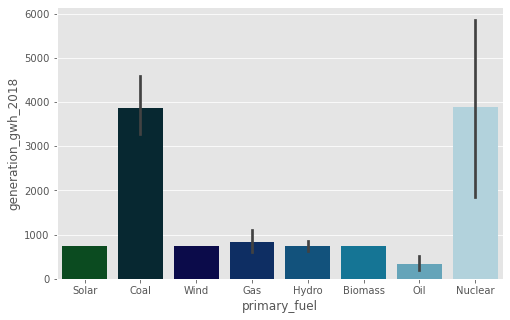

In [47]:
plt.figure(figsize = (8, 5))
sns.barplot('primary_fuel', 'generation_gwh_2018', data = df, palette = 'ocean')
plt.show()

* From the above graphs I can observe that the fuel type Nuclear has the highest electrical generation reports for all the year followed by Coal.
* Other fuel types has very has power generation report.

# Checking Relationship between Targets

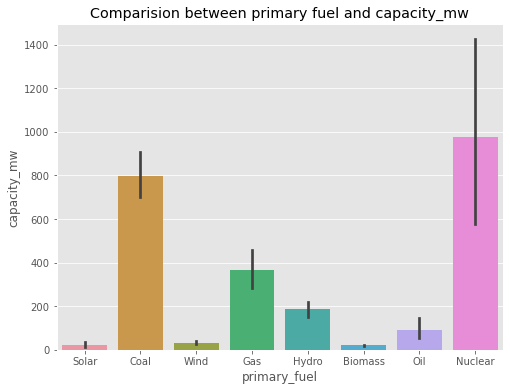

In [48]:
#let's visualize the relationship between primary fuel and capacity mw
plt.figure(figsize = (8,6))
plt.title('Comparision between primary fuel and capacity_mw')
sns.barplot('primary_fuel', 'capacity_mw', data = df)
plt.show()

* The above plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.
* Also, the capacity of generating electricity is very less in Solar, Wind and Biomass.

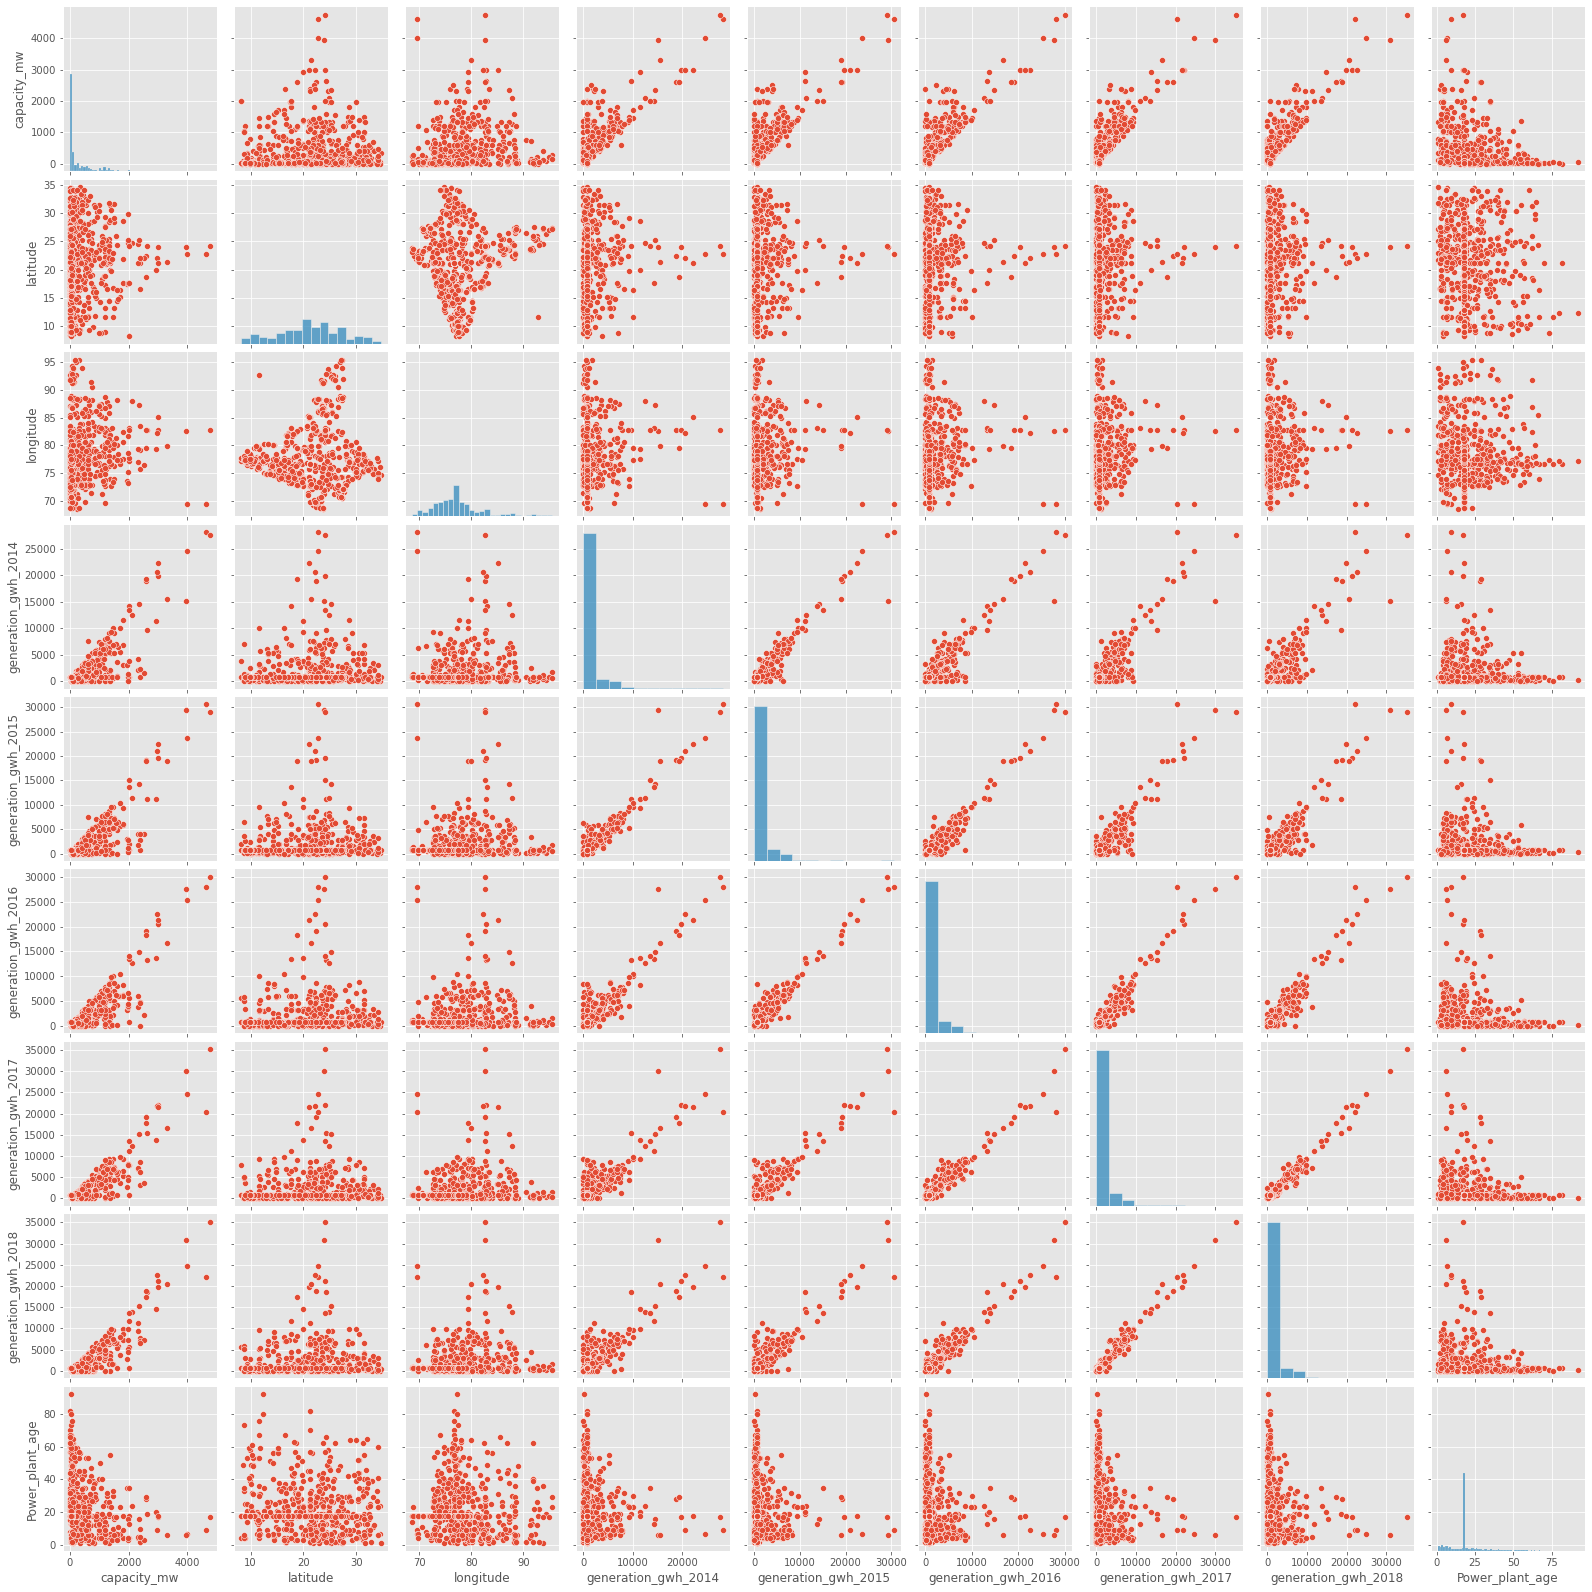

In [49]:
#Checking the pairwise relation between the features and capacity_mw
sns.pairplot(df)
plt.show()

* Seeing some features are correlated and also seeing some outliers present.

# Outliers Handling 

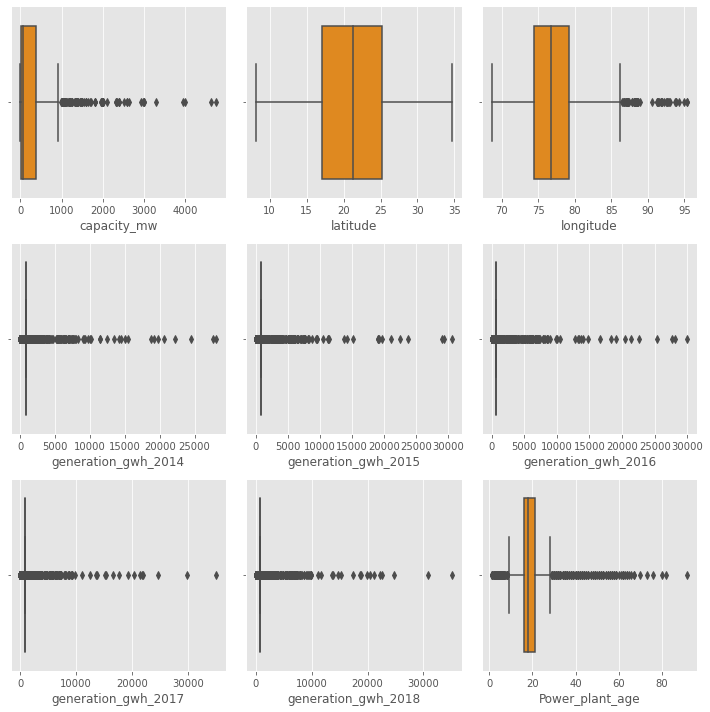

In [50]:
#Identifying the outliers in numerical columns
plt.figure(figsize = (10,10))
plotnumber = 1

for column in numerical_cols:
    if plotnumber <= 9:
        ax = plt.subplot(3,3, plotnumber)
        sns.boxplot(df[column], color = 'darkorange')
        plt.xlabel(column, fontsize = 12)
    plotnumber += 1
plt.tight_layout()

* In the boxplot we can see that ouliers are present in all columns excel latitude.

In [51]:
#Checking skewness of the dataset
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
Power_plant_age        1.719575
dtype: float64

* I can see some skewness present in the dataset.

# Remove Skewness using Z score method

In [52]:
#Features containing outliers
features = df[['longitude', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']]


In [53]:
z = np.abs(zscore(features))
threshold = 3
np.where(z > 3)

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 158, 179, 183, 209,
        209, 209, 209, 209, 219, 222, 244, 308, 308, 308, 308, 308, 323,
        333, 340, 342, 360, 364, 364, 364, 364, 364, 371, 416, 427, 444,
        454, 478, 482, 484, 493, 493, 493, 493, 493, 494, 494, 494, 494,
        494, 499, 519, 532, 538, 541, 546, 573, 577, 583, 592, 601, 621,
        623, 638, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 695,
        695, 695, 695, 695, 706, 709, 721, 721, 721, 721, 721, 724, 724,
        724, 724, 724, 726, 726, 726, 726, 726, 728, 786, 786, 786, 786,
        786, 807, 808, 808, 808, 808, 808, 818, 847, 848, 880, 880, 880,
        880, 880], dtype=int64),
 array([2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 0, 0, 1, 2, 3, 4, 5, 6, 6, 0, 1, 2,
        3, 4, 5, 0, 0, 0, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 6, 6, 6, 5, 6, 1,
        2, 3, 4, 5, 1, 2, 3, 4, 5, 0, 0, 1, 6, 6, 0, 6, 0, 6, 6, 6, 6, 1,
        0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 6, 1, 2, 3, 4,
        5, 1, 

In [54]:
new_df = df[(z < 3).all(axis = 1)]

In [55]:
new_df.skew()

capacity_mw            2.170245
latitude              -0.119551
longitude              0.945877
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

* Skewness have been reduced will try to reduce it more in further process.

In [56]:
new_df.shape

(851, 13)

In [57]:
df.shape

(907, 13)

In [58]:
#Printing data loss after removing skewness
data_loss = (907 - 851)/907 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  6.174200661521499


* 6.17% data has been removed while removing outliers using Z score method.

# Encoding the categorical columns using Label Encoder

In [59]:
categorical_cols

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [60]:
#Will use Label Encoder to convert all catgorical columns to integer
lab_enc = LabelEncoder()

new_df[categorical_cols] = new_df[categorical_cols].apply(lab_enc.fit_transform)

In [61]:
new_df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


# Correlation between the target variable and features

In [62]:
#Checking the correlation between features and target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


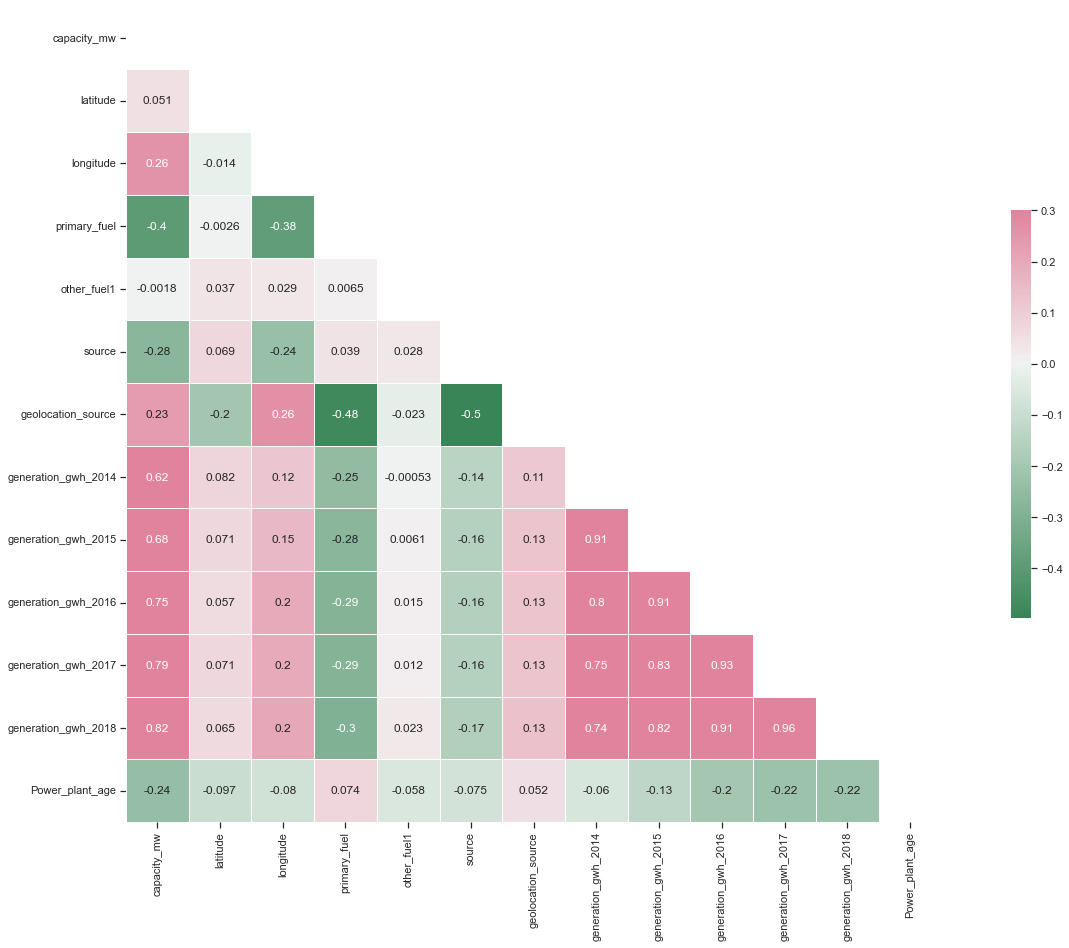

In [63]:
#Visualizing correlation using heatmap
sns.set_theme(style = 'ticks')
corr = new_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (25,15))
cmap = sns.diverging_palette(500,1, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
           square = True, linewidths = .5, cbar_kws = {'shrink': .5}, annot = True)

plt.show()

### Correlation between Capacity_mw and other features

 * Capacity_mw has positive relationship with features generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018.
 * Capacity mw is negatively correlated with the features primary fuel, source and power plant age.
 * The columns other_fuel1 and latitude have no relationship with capacity_mw.
 
### Correlation between Primary_fuel and other features

 * The target primary fuel is less correlated with source and power plant age.
 * This target variable is negatively correlated with geolocation_source, longitude, capacity_mw and generation_gwh years.


#### From the above heatmap we can observe that some features are correlated which other which leads to multicollinearity issue will handle it in later process. Also, features other_fuel1 and latitude have no relationship with both the target variables so we can drop them.    

# Visualizing the correlation between features and target Capacity_mw

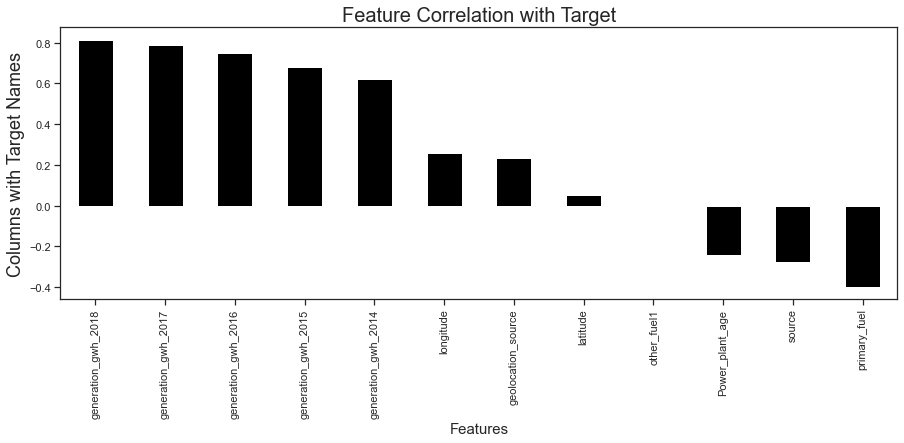

In [64]:
#Checking columns which are positively and negatively correlated.
plt.figure(figsize = (15,5))
new_df.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind = 'bar', color = 'black')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Columns with Target Names', fontsize = 18)
plt.title('Feature Correlation with Target', fontsize = 20)
plt.show()

# Visualizing the correlation between features and target Primery Fuel

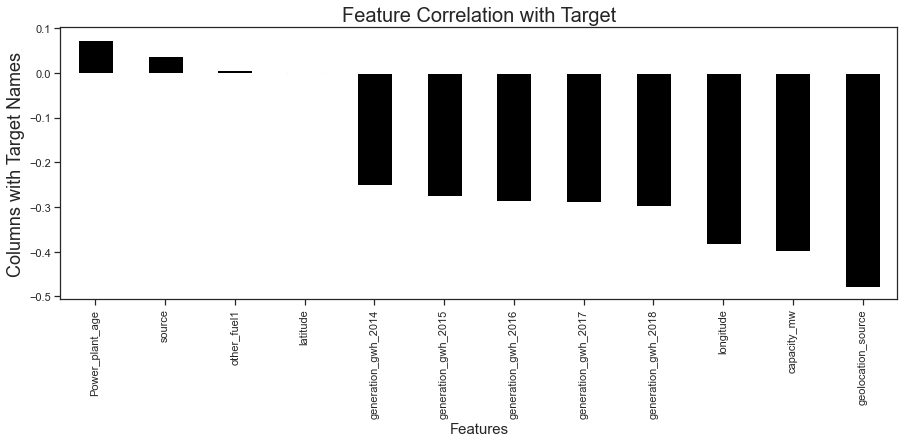

In [65]:
#Checking columns which are positively and negatively correlated.
plt.figure(figsize = (15,5))
new_df.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind = 'bar', color = 'black')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Columns with Target Names', fontsize = 18)
plt.title('Feature Correlation with Target', fontsize = 20)
plt.show()

* From both the correlation plots we can observe that, the columns other_fuel1 and latitude ahve very less correlation with both the targets so will drop them.

In [66]:
#Droping other_fuel1 and latitude
new_df.drop(columns = ['other_fuel1', 'latitude'], axis = 1, inplace = True)

In [67]:
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


# 1. Perdiction for Capacity_mw

In [68]:
#Deviding dataset into x and y variable
x = new_df.drop('capacity_mw', axis = 1)
y = new_df['capacity_mw']

In [69]:
x.shape

(851, 10)

In [70]:
y.shape

(851,)

# Scaling x data

In [71]:
#Scaling data using standrd scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.878742,1.175506,1.397951,-1.036523,-0.278639,-0.307824,-0.312243,-0.307505,-0.325380,-1.007591
1,-0.560482,-0.975797,2.821796,0.407145,-0.278639,-0.307824,-0.312243,-0.307505,-0.325380,-0.109163
2,-1.778302,1.605767,-0.529717,0.407145,-0.278639,-0.307824,-0.312243,-0.307505,-0.325380,-0.109163
3,3.335760,-0.545536,-0.507812,0.407145,-0.401877,-0.221867,-0.219914,-0.399232,-0.396134,-0.378691
4,1.253781,-0.975797,-0.507812,0.407145,1.223351,3.067297,3.104084,2.409508,3.357413,-1.366962
...,...,...,...,...,...,...,...,...,...,...
846,0.078642,-0.975797,-0.507812,0.407145,-0.278639,-0.768320,-0.624731,-0.279296,-0.362135,-1.456805
847,0.266718,1.175506,0.696980,-2.480190,-0.278639,-0.307824,-0.312243,-0.307505,-0.325380,-0.109163
848,-0.334377,1.605767,-0.529717,0.407145,-0.278639,-0.307824,-0.312243,-0.307505,-0.325380,-0.109163
849,-0.760816,-0.975797,0.302685,0.407145,-0.278639,-0.307824,-0.312243,-0.307505,-0.325380,-0.109163


In [72]:
# Checking multicollinearity problem using VIF
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]

vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.263942,longitude
1,1.731442,primary_fuel
2,1.569189,source
3,1.883360,geolocation_source
4,6.298492,generation_gwh_2014
5,12.809162,generation_gwh_2015
6,14.385056,generation_gwh_2016
7,18.906409,generation_gwh_2017
8,14.790797,generation_gwh_2018
9,1.104942,Power_plant_age


* I can clearly see multicollinearity problem exist in this dataset. First I will drop generation_gwh_2017 column and will check VIF again.

In [73]:
#Droping generation_gwh_2017 column
x = x.drop(columns = ['generation_gwh_2017'])

#Scaling x data after removing column generation_gwh_2017
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]

vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.263714,longitude
1,1.731437,primary_fuel
2,1.569040,source
3,1.883350,geolocation_source
4,6.264716,generation_gwh_2014
5,12.596760,generation_gwh_2015
6,11.633005,generation_gwh_2016
7,6.273636,generation_gwh_2018
8,1.103625,Power_plant_age


* Still seeing multicollinearity problem will delete generation_gwh_2015 column and will check VIF values again.

In [74]:
#Droping generation_gwh_2015 column
x = x.drop(columns = ['generation_gwh_2015'])

#Scaling x data after removing column generation_gwh_2015
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]

vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.262896,longitude
1,1.729166,primary_fuel
2,1.567620,source
3,1.883177,geolocation_source
4,2.904856,generation_gwh_2014
5,7.766414,generation_gwh_2016
6,6.211228,generation_gwh_2018
7,1.103322,Power_plant_age


* No column has VIF value 10 so multicollinearity problem has been resolved now.

# Will remove skewness using Power Transformer

In [75]:
#Checking skewness
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2016    2.645786
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In [76]:
#Will remove remaining skewness by using Power Tranform
PT = PowerTransformer(method = 'yeo-johnson')
transform = PT.fit_transform(x)

In [77]:
transformed = pd.DataFrame(transform)
transformed.columns = x.columns

In [78]:
transformed.skew()

longitude             -0.024111
primary_fuel           0.086547
source                 0.655717
geolocation_source    -2.039009
generation_gwh_2014   -0.072446
generation_gwh_2016    0.123088
generation_gwh_2018    0.181668
Power_plant_age       -0.073701
dtype: float64

* Skewness have been removed from the dataset.

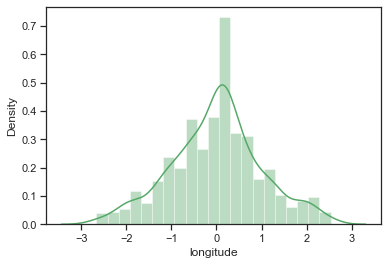

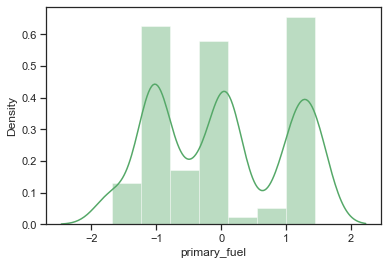

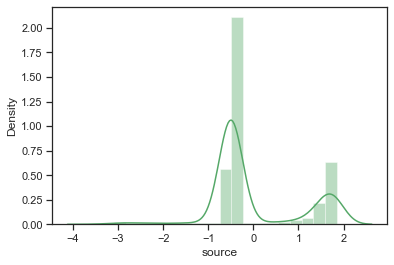

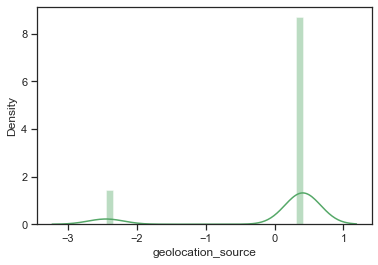

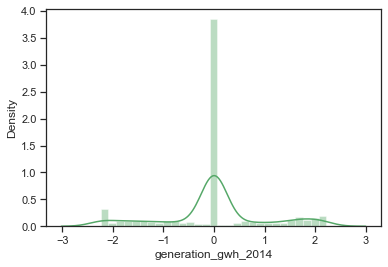

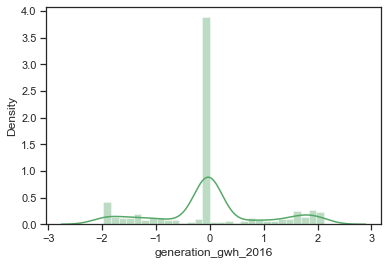

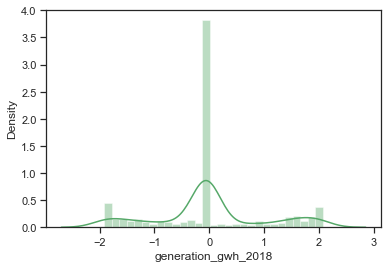

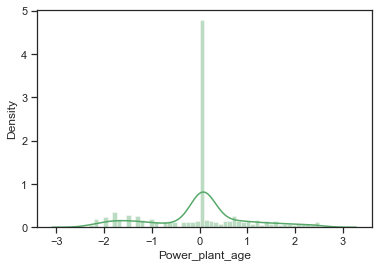

In [79]:
#Checking data distribution after removing skewness.
for i in transformed.columns:
    plt.figure()
    sns.distplot(transformed[i], color = 'g')
    
plt.show()

# Spliting data into train/test and Regression Model Building

In [80]:
#Train Test Split / finding best random_state for my model
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(transformed, y ,random_state = i,test_size = 0.2)
    LR.fit(x_train,y_train)
    train_pred = LR.predict(x_train)
    test_pred = LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2) == round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X' * 50,'\n')

At random state  25 The model performance very well
At random state:  25
Test R2 score is:  0.54
Train R2 score is:  0.54
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  34 The model performance very well
At random state:  34
Test R2 score is:  0.54
Train R2 score is:  0.54
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  44 The model performance very well
At random state:  44
Test R2 score is:  0.54
Train R2 score is:  0.54
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  65 The model performance very well
At random state:  65
Test R2 score is:  0.54
Train R2 score is:  0.54
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  76 The model performance very well
At random state:  76
Test R2 score is:  0.54
Train R2 score is:  0.54
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [82]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(transformed, y,random_state = 76,test_size = 0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [83]:
#Regression models
LR_model = LinearRegression()
RD_model = Ridge()
LS_model = Lasso()
DT_model = DecisionTreeRegressor()
SV_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
XGB_model = XGBRegressor()
Elastic_model = ElasticNet()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
ADA_model = AdaBoostRegressor()
GB_model = GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [85]:
#Checking R2, MAE, MSE, RMSE and CV score for all model
for m in model:
    m.fit(x_train,y_train)
    print('MAE of ',m ,'model', mean_absolute_error(y_test, m.predict(x_test)))
    print('MSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test)))
    print('RMSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test), squared = False))
    print('Training R2 Score of',m,'model', r2_score(y_train, m.predict(x_train)) * 100)
    print('Test R2 Score of',m,'model', r2_score(y_test, m.predict(x_test)) * 100)
    print("cross Validation score of ", m," is ",cross_val_score(m, transform, y, cv = 10).mean())
    print('X' * 50, '\n\n')

MAE of  LinearRegression() model 232.65300454753606
MSE of LinearRegression() model 89240.38110576027
RMSE of LinearRegression() model 298.7312857833278
Training R2 Score of LinearRegression() model 54.29267504827941
Test R2 Score of LinearRegression() model 53.962904041007654
cross Validation score of  LinearRegression()  is  0.4903279763025868
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Ridge() model 232.65739845583903
MSE of Ridge() model 89239.5738485203
RMSE of Ridge() model 298.7299346374921
Training R2 Score of Ridge() model 54.29252962579116
Test R2 Score of Ridge() model 53.963320486775366
cross Validation score of  Ridge()  is  0.49065867586489914
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Lasso() model 232.55529166877105
MSE of Lasso() model 88956.37152182327
RMSE of Lasso() model 298.2555473445939
Training R2 Score of Lasso() model 54.2877076602176
Test R2 Score of Lasso() model 54.109418167314296
cross Validation score of  Lasso()  is  

cross Validation score of  AdaBoostRegressor()  is  0.56682376947337
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  GradientBoostingRegressor() model 131.4553541985408
MSE of GradientBoostingRegressor() model 53398.76852758858
RMSE of GradientBoostingRegressor() model 231.0817355993082
Training R2 Score of GradientBoostingRegressor() model 95.09182294355494
Test R2 Score of GradientBoostingRegressor() model 72.45278202159162
cross Validation score of  GradientBoostingRegressor()  is  0.7530505473211814
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 




* Will choose Random Forest Regressor as my best model because it has the minium difference between training and testing score, lowest MAE, MSE, RMSE and CV values.

# Hyper Parameter Tuning for Random Forest Regressor

In [87]:
#Let's tune the parameters using GridsearchCv
params = {'n_estimators': [20,100,200],
          'max_depth': [None, 1, 2, 5],
          'max_features': [0.5, 1, 'auto', 'sqrt'],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 3, 5]}

GCV = GridSearchCV(RFR_model, params, cv = 10, scoring = 'r2', n_jobs = -1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 5],
                         'max_features': [0.5, 1, 'auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 100, 200]},
             scoring='r2')

In [88]:
GCV.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [89]:
GCV_pred = GCV.best_estimator_.predict(x_test)
r2_score(y_test, GCV_pred)

0.8015814278158082

* We have successfully tuned the model as R2 score have incraesed from 78% to 80%. Will save the tuned model and use it predict capacity_mw.

In [91]:
RFR_model1 = GCV.best_estimator_

In [95]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(RFR_model1, open('RFR1_model', 'wb'))

In [96]:
#Loading saved model
loaded_model = pickle.load(open('RFR1_model','rb'))

In [97]:
#Prediction using saved model
Capacity = loaded_model.predict(x_test)
Capacity

array([  15.34824809,   25.13020382,  845.71150411,  343.32260759,
         17.29203436,  686.60658348,  377.73036051,  255.03265927,
         31.24303889,   17.72326297,  132.69006832,   12.50153793,
        164.32627276,  156.73997292,    6.39272848,   47.34100042,
       1254.29334431,   32.47192477,    6.28034538,  327.25551116,
         45.88539733,  638.20922517,   13.75946482,   32.09310176,
        223.98117594,   96.9608382 ,  802.31405303,   39.35378364,
        142.00913017,   65.27265234, 1478.67862132,   24.98642881,
        662.62701548,   16.05090762,    9.18613243,   12.49764846,
         67.16325712,  989.27727522, 1225.25665925,   17.32120207,
          7.60203246,   45.59100371,  454.95529947,  486.83437082,
       1550.56942968,   34.42653193,   13.65643551,   13.28849482,
         11.27149969,  106.70664355,   13.16733497,   77.22356671,
       1368.45062937,   33.30958321,  797.06375065,  569.65821033,
         80.17681382,   64.9300526 ,   33.30958321,  760.78113

In [98]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
DF = pd.DataFrame({'Actual Capacity': y_test, 'Predicted Capacity': Capacity})
DF.head()

,Actual Capacity,Predicted Capacity
407,1.000,15.348248
501,6.600,25.130204
543,630.000,845.711504
210,431.586,343.322608
395,6.000,17.292034


# Visualizing Error Residual

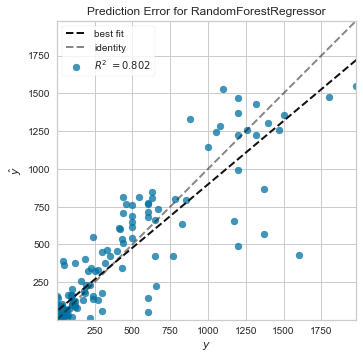

In [99]:
#Importing Prediction Error and Residuals Plot
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(RFR_model1)

#Fit the training data to the visualizer and evaluate the model on the test data
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof() 
plt.show()

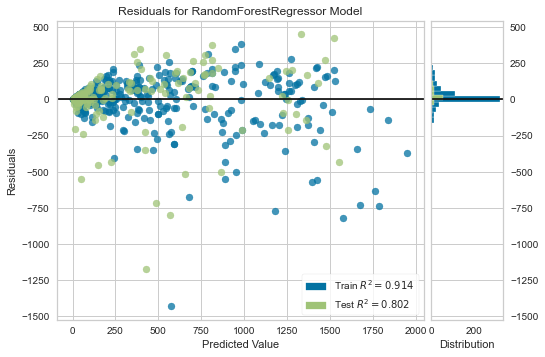

In [100]:
#Residual for Linear model
visualizer = ResidualsPlot(RFR_model1)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test) 
visualizer.poof()
plt.show()

# Roandom Forest model performance is looking good with training R2 score 91% and test R2 score 80%.

# 2. Perdiction for Primary Fuel

In [101]:
#Deviding dataset into x and y variable
x1 = new_df.drop('primary_fuel', axis = 1)
y1 = new_df['primary_fuel']

In [102]:
x1.shape

(851, 10)

In [103]:
y1.shape

(851,)

In [104]:
#Checking for skewness
x1.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

* We can see some skewness present in most of the columns will treat them using power transformation technique.

In [105]:
#Will remove remaining skewness by using Power Tranform
transform1 = PT.fit_transform(x1)

In [106]:
transformed1 = pd.DataFrame(transform1)
transformed1.columns = x1.columns

In [107]:
transformed1.skew()

capacity_mw            0.016303
longitude             -0.000128
source                -0.173043
geolocation_source    -2.039798
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.037156
dtype: float64

* Skewness have been removed from the datset.

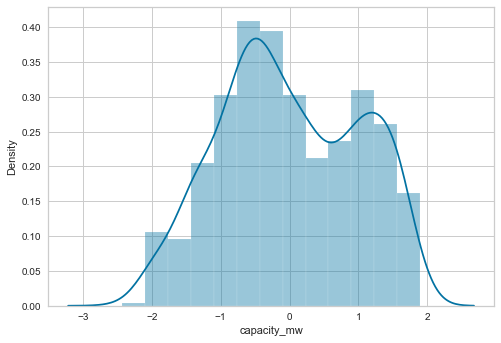

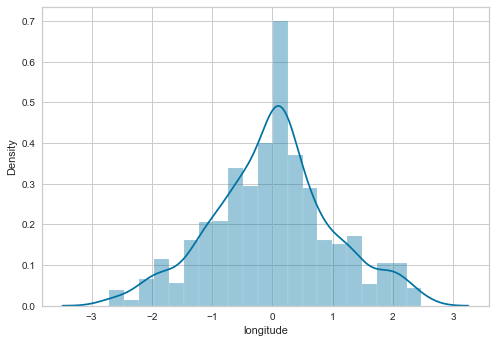

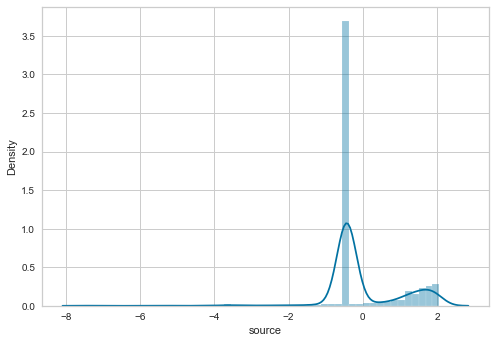

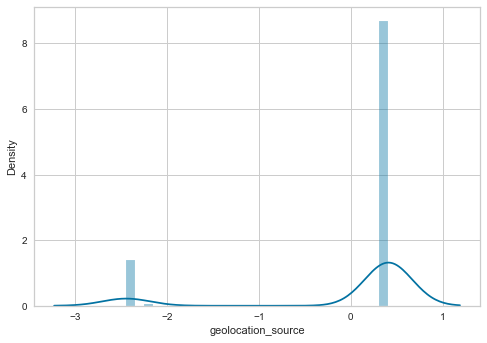

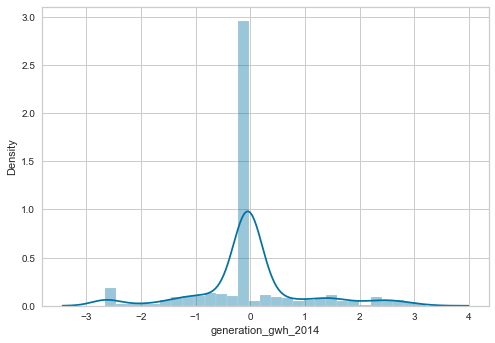

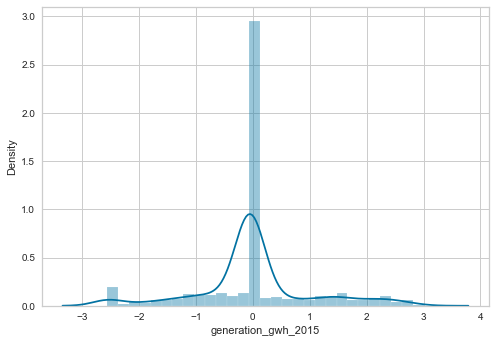

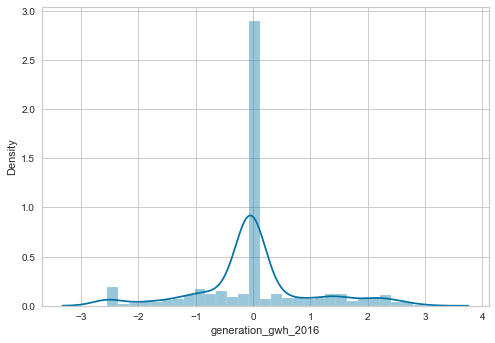

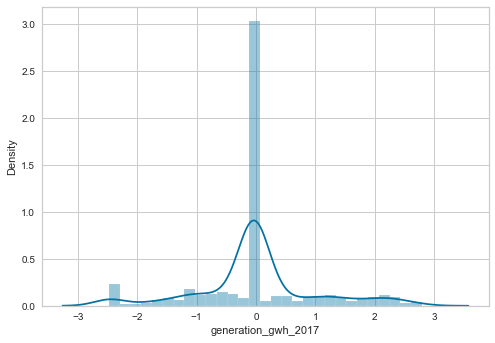

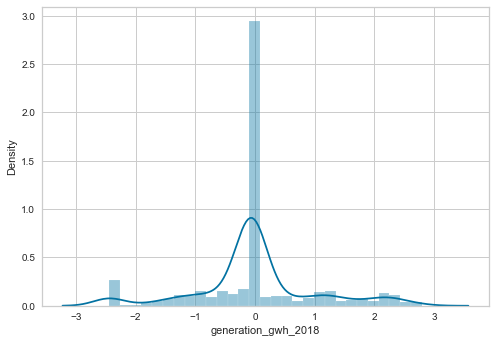

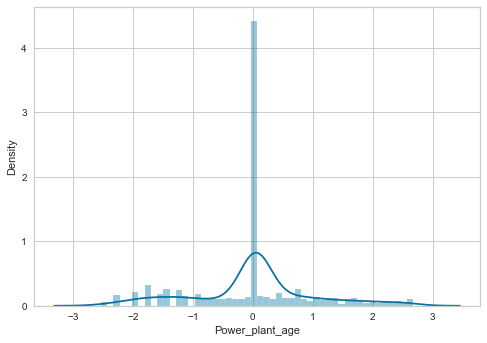

In [109]:
#Checking data distribution after removing skewness.
for i in transformed1.columns:
    plt.figure()
    sns.distplot(transformed1[i], color = 'b')
    
plt.show()

# Scaling data

In [110]:
#Scaling data using standrd scaler
x_scaled = pd.DataFrame(scaler.fit_transform(transformed), columns = transformed.columns)
x_scaled

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2016,generation_gwh_2018,Power_plant_age
0,-0.935922,1.158688,1.674441,-2.402802,0.004060,-0.028366,-0.055411,-1.191797
1,-0.498472,-1.031427,1.829636,0.409086,0.004060,-0.028366,-0.055411,0.072299
2,-2.367161,1.444254,-0.570671,0.409086,0.004060,-0.028366,-0.055411,0.072299
3,2.479276,-0.445811,-0.478771,0.409086,-0.381887,0.232099,-0.293278,-0.261225
4,1.232809,-1.031427,-0.478771,0.409086,1.648954,1.977596,1.989468,-1.809857
...,...,...,...,...,...,...,...,...
846,0.249308,-1.031427,-0.478771,0.409086,0.004060,-1.229057,-0.175695,-1.973474
847,0.433279,1.158688,1.472941,-2.445867,0.004060,-0.028366,-0.055411,0.072299
848,-0.212654,1.444254,-0.570671,0.409086,0.004060,-0.028366,-0.055411,0.072299
849,-0.769252,-1.031427,1.237795,0.409086,0.004060,-0.028366,-0.055411,0.072299


In [111]:
# Checking multicollinearity problem using VIF
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x_scaled.values,i)
              for  i in range(len(x_scaled.columns))]

vif['features'] = x_scaled.columns

# let's check the values
vif

,VIF values,features
0,1.270532,longitude
1,1.737929,primary_fuel
2,1.476839,source
3,1.859340,geolocation_source
4,3.014769,generation_gwh_2014
5,6.173670,generation_gwh_2016
6,4.808621,generation_gwh_2018
7,1.116018,Power_plant_age


* No feature has VIF value 10 so there is no multicollinearity problem.

# Oversampling

In [113]:
#Will balance out the data using SMOTE
smt = SMOTE()

In [114]:
x_scaled, y1 = smt.fit_resample(x_scaled, y1)

In [115]:
y1.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

* Datset have been blanaced out successfully.

# PCA to remove curse of dimentionality

In [117]:
pca = PCA()
principle_comp = pca.fit_transform(x_scaled)

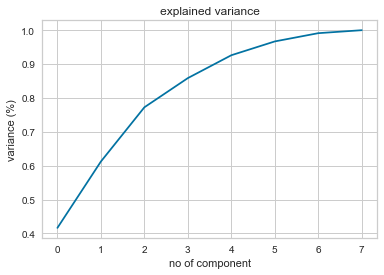

In [118]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

* Graph shows 6 components has explained 98% - 99% variance of all features, so will use 6.

In [120]:
pca = PCA(n_components = 6)

In [121]:
x_new = pca.fit_transform(x_scaled)

In [122]:
x_new

array([[ 0.05783061,  2.85653458, -0.97166606,  1.61512224,  0.23273316,
         0.10166413],
       [ 0.15541784, -0.03927381, -1.97874124, -0.58771983,  0.22980189,
        -0.3315126 ],
       [-0.09557867,  1.27457265,  1.35702832, -0.89906008,  1.73848301,
        -0.03987273],
       ...,
       [-0.07778291,  0.30139537,  1.38636575,  0.04448839,  0.18280083,
        -0.58795786],
       [-0.07508738,  0.15398783,  1.3908095 ,  0.18740805, -0.05283896,
        -0.67097653],
       [-0.07508738,  0.15398783,  1.3908095 ,  0.18740805, -0.05283896,
        -0.67097653]])

In [123]:
#Find best Random_state
maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x_new, y1, random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.984251968503937 on Random State = 64


In [124]:
#Training model best random state = 64
x_train,x_test,y_train,y_test = train_test_split(x_new, y1, test_size = 0.2, random_state = 64)

In [125]:
Lr_model = LogisticRegression()
Rd_model = RidgeClassifier()
Dt_model = DecisionTreeClassifier()
Sv_model = SVC()
KNN_model = KNeighborsClassifier()
RfR_model = RandomForestClassifier()
XGBoost_model = XGBClassifier()
SgH_model = SGDClassifier()
Bagging_model = BaggingClassifier()
ADAB_model = AdaBoostClassifier()
GBoost_model = GradientBoostingClassifier()

model = [Lr_model,Rd_model,Dt_model,Sv_model,KNN_model,RfR_model,XGBoost_model,SgH_model,Bagging_model,ADAB_model,GBoost_model]

In [126]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred = m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 98.4251968503937
Confusion Matrix of  LogisticRegression()  is 
 [[53  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0]
 [ 0  0  0 44  2  0  0  0]
 [ 0  0  0  1 43  0  0  0]
 [ 0  0  0  0  0 53  0  2]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      0.98      0.99        48
           2       0.98      1.00      0.99        48
           3       0.98      0.96      0.97        46
           4       0.96      0.98      0.97        44
           5       1.00      0.96      0.98        55
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45

    accuracy                           0.98       381
   macro avg       0.98      0.98      0.98       381
weighted avg       0.98      0.98      0.98       381

************************

Accuracy_Score of  AdaBoostClassifier() is 33.07086614173229
Confusion Matrix of  AdaBoostClassifier()  is 
 [[ 0  0  0  0 53  0  0  0]
 [ 0  0  0  0 47  0  0  1]
 [ 0  0  0  0 48  0  0  0]
 [ 0  0  0  0 46  0  0  0]
 [ 0  0  0  0 44  0  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0 39  3]
 [ 0  0  0  0  0  0  2 43]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        46
           4       0.15      1.00      0.26        44
           5       0.00      0.00      0.00        55
           6       0.95      0.93      0.94        42
           7       0.91      0.96      0.93        45

    accuracy                           0.33       381
   macro avg       0.25      0.36      0.27       381
weighted avg       0.23      0.33      0.24       381

***********************

In [128]:
#Checking Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i, x_new, y1, cv = 5, scoring = 'accuracy').mean() * 100)
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 98.4251968503937
cross Validation accuracy score of  LogisticRegression()  is  94.85343279458489
**************************************************
Accuracy_Score of  RidgeClassifier() is 80.83989501312337
cross Validation accuracy score of  RidgeClassifier()  is  77.46815858543998
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 98.16272965879264
cross Validation accuracy score of  DecisionTreeClassifier()  is  96.69125569830086
**************************************************
Accuracy_Score of  SVC() is 99.21259842519686
cross Validation accuracy score of  SVC()  is  99.10705898604778
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 94.22572178477691
cross Validation accuracy score of  KNeighborsClassifier()  is  93.80204448128194
**************************************************
Accuracy_Score of  RandomForestClassifier() is 99.73753280839895


# Except Adaboost Classifier all models are givng good preformance will check AUC ROC curve for all models.

In [133]:
#!pip install scikit-plot

In [ ]:
Lr_model = LogisticRegression()
Rd_model = RidgeClassifier()
Dt_model = DecisionTreeClassifier()
Sv_model = SVC()
KNN_model = KNeighborsClassifier()
RfR_model = RandomForestClassifier()
XGBoost_model = XGBClassifier()
SgH_model = SGDClassifier()
Bagging_model = BaggingClassifier()
ADAB_model = AdaBoostClassifier()
GBoost_model = GradientBoostingClassifier()

# Logistic Regression

In [135]:
lr_prob = Lr_model.predict_proba(x_test)

In [136]:
roc_auc_score(y_test,lr_prob,multi_class = 'ovo',average = 'weighted')

0.9985490882315597

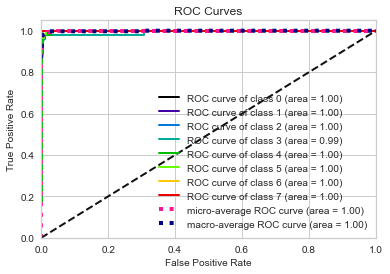

In [137]:
sktplt.metrics.plot_roc(y_test,lr_prob)
plt.show()

# DecisionTree Classifier

In [140]:
dt_prob = Dt_model.predict_proba(x_test)

In [142]:
roc_auc_score(y_test,dt_prob,multi_class = 'ovo',average = 'weighted')

0.9893540820984333

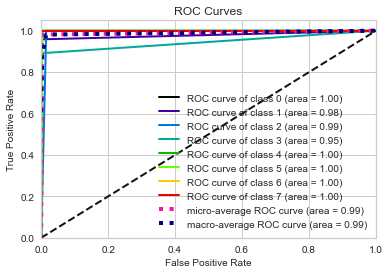

In [143]:
sktplt.metrics.plot_roc(y_test,dt_prob)
plt.show()

# Support Vector Classifier

In [144]:
sv = SVC(probability = True)
sv = SVC(probability = True).fit(x_train, y_train.ravel())
sv_pred = sv.predict(x_test)
sv_prb = sv.predict_proba(x_test)
roc_auc_score(y_test,sv_prb,multi_class = 'ovo',average = 'weighted')

1.0

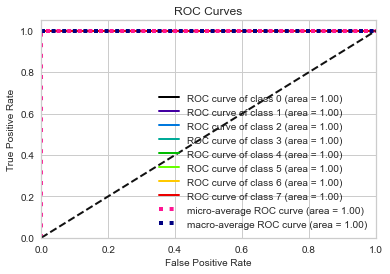

In [145]:
sktplt.metrics.plot_roc(y_test,sv_prb)
plt.show()

# KNN Classifier

In [146]:
kn_prob = KNN_model.predict_proba(x_test)
roc_auc_score(y_test,kn_prob,multi_class = 'ovo',average = 'weighted')

0.9956272434201653

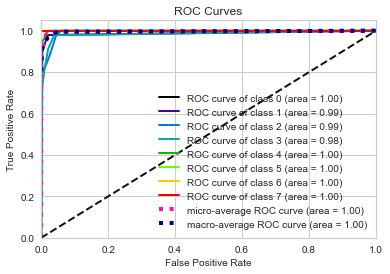

In [147]:
sktplt.metrics.plot_roc(y_test,kn_prob)
plt.show()

# Random Forest Classifier

In [148]:
Rf_prob = RfR_model.predict_proba(x_test)
roc_auc_score(y_test,Rf_prob,multi_class = 'ovo',average = 'weighted')

1.0

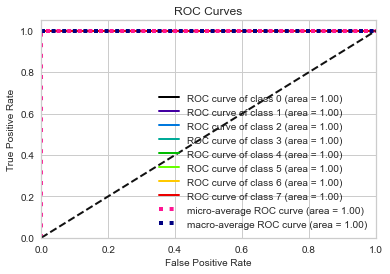

In [149]:
sktplt.metrics.plot_roc(y_test,Rf_prob)
plt.show()

# XGB Classifier

In [150]:
Xg_prob = XGBoost_model.predict_proba(x_test)
roc_auc_score(y_test,Xg_prob,multi_class = 'ovo',average = 'weighted')

0.9999851138890657

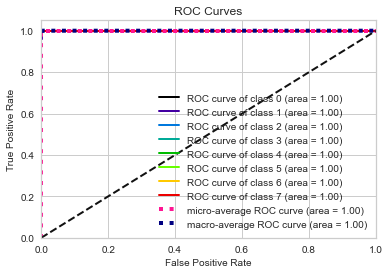

In [151]:
sktplt.metrics.plot_roc(y_test,Xg_prob)
plt.show()

# Bagging Classifier

In [153]:
Bg_prob = Bagging_model.predict_proba(x_test)
roc_auc_score(y_test,Bg_prob,multi_class = 'ovo',average = 'weighted')

0.9999878339159467

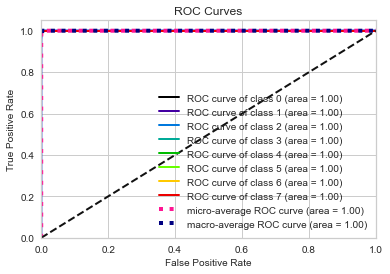

In [154]:
sktplt.metrics.plot_roc(y_test,Bg_prob)
plt.show()

# Adaboost Classifier

In [155]:
Ad_prob = ADAB_model.predict_proba(x_test)
roc_auc_score(y_test,Ad_prob,multi_class = 'ovo',average = 'weighted')

0.6869202733586873

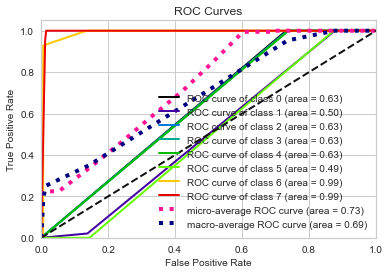

In [156]:
sktplt.metrics.plot_roc(y_test,Ad_prob)
plt.show()

# Gradient Boost Classifier

In [157]:
Gb_prob = GBoost_model.predict_proba(x_test)
roc_auc_score(y_test,Gb_prob,multi_class = 'ovo',average = 'weighted')

0.9992810852628884

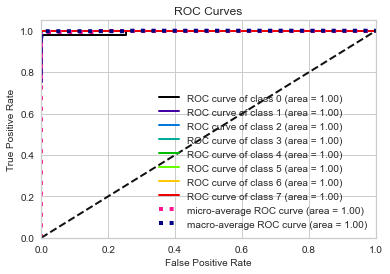

In [158]:
sktplt.metrics.plot_roc(y_test,Gb_prob)
plt.show()

In [160]:
#Model Confidence/Accuracy

def metric_score(RfR_model,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = RfR_model.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = RfR_model.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [161]:
#Call the function and pass dataset to check train and test score.
metric_score(RfR_model,x_train,x_test,y_train,y_test,train = True)
metric_score(RfR_model,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 100.00%

====================================Test Result================================
Accurancy Score: 99.74%


 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        48
           2       0.98      1.00      0.99        48
           3       1.00      0.98      0.99        46
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        45

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



# Choosing Random Forest Classifier as my best model as all models have given best score and there is high chance of over fitting but Random Forest doesn't overfit and giving good performance as well. Next Hypertune the model.

# Hyper Tuning Random Forest Classifier

In [162]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[13,15],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_leaf':[5,6],
    'min_samples_split':[10,11],
}
grd = GridSearchCV(RfR_model, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [163]:
RFR_models = grd.best_estimator_
RFR_models.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=15)

In [164]:
#Call the function and pass dataset to check train and test score.
metric_score(RFR_models,x_train,x_test,y_train,y_test,train = True)
metric_score(RFR_models,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 99.80%

====================================Test Result================================
Accurancy Score: 98.69%


 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      0.94      0.97        48
           2       0.92      0.98      0.95        48
           3       0.98      0.98      0.98        46
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        45

    accuracy                           0.99       381
   macro avg       0.99      0.99      0.99       381
weighted avg       0.99      0.99      0.99       381



* Will save the original Random Forest Model and use it from our prediction

# Saving Model

In [165]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(RfR_model, open('Fuel_model', 'wb'))

In [166]:
#Loading saved model
loaded_model = pickle.load(open('Fuel_model','rb'))

In [167]:
Fuel = loaded_model.predict(x_test)
Fuel

array([6, 3, 2, 2, 5, 4, 5, 4, 2, 2, 2, 1, 5, 2, 5, 2, 6, 1, 3, 1, 5, 0,
       5, 5, 7, 5, 1, 0, 2, 2, 5, 0, 3, 0, 1, 3, 5, 2, 2, 4, 3, 2, 5, 3,
       6, 6, 5, 5, 2, 1, 0, 0, 0, 1, 1, 0, 0, 6, 1, 2, 1, 0, 0, 5, 2, 1,
       5, 4, 4, 5, 7, 0, 2, 7, 5, 0, 6, 6, 1, 3, 4, 5, 0, 0, 6, 7, 5, 7,
       3, 5, 4, 7, 7, 5, 7, 3, 2, 1, 1, 2, 5, 5, 0, 4, 2, 0, 1, 1, 5, 0,
       7, 6, 4, 5, 7, 0, 0, 3, 7, 0, 3, 1, 0, 0, 7, 4, 2, 2, 4, 7, 6, 3,
       3, 0, 0, 1, 0, 3, 5, 5, 2, 5, 1, 2, 0, 7, 3, 2, 7, 4, 5, 3, 4, 7,
       1, 6, 1, 1, 7, 6, 3, 1, 2, 2, 6, 6, 7, 7, 7, 3, 5, 2, 5, 7, 4, 0,
       3, 6, 5, 4, 1, 1, 6, 3, 4, 6, 0, 0, 7, 1, 0, 1, 0, 6, 3, 0, 4, 2,
       0, 2, 1, 0, 0, 3, 3, 5, 6, 5, 4, 2, 2, 3, 3, 4, 4, 5, 0, 3, 3, 3,
       2, 6, 6, 0, 0, 7, 6, 7, 0, 4, 7, 5, 3, 1, 7, 2, 3, 7, 3, 1, 3, 6,
       5, 1, 6, 1, 4, 6, 1, 3, 3, 5, 5, 2, 7, 3, 6, 4, 0, 4, 7, 1, 2, 7,
       5, 1, 7, 4, 6, 2, 1, 2, 0, 4, 1, 0, 6, 2, 7, 3, 5, 4, 3, 4, 1, 5,
       0, 1, 5, 5, 1, 4, 6, 1, 5, 4, 7, 3, 2, 6, 4,

In [169]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
Fuel_type = pd.DataFrame({'Actual Fuel Type': y_test, 'Predicted Fuel Type': Fuel})
Fuel_type.head(20)

,Actual Fuel Type,Predicted Fuel Type
1710,6,6
485,3,3
1085,2,2
1124,2,2
1471,5,5
1299,4,4
1480,5,5
1352,4,4
1153,2,2
1151,2,2


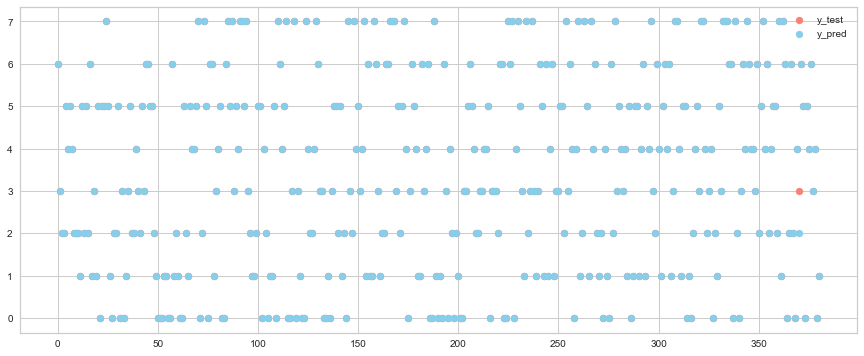

In [172]:
#Visualize Actual vs Predicted Attrition
fig = plt.figure(figsize = (15,6))
plt.scatter(range(y_test.shape[0]), y_test, color = "salmon", label ="y_test")
plt.scatter(range(y_test.shape[0]), Fuel, color = "skyblue", label = "y_pred")
plt.legend();